# 결정 트리
- 분류, 회귀, 다중출력 작업도 가능한 머신러닝 알고리즘
- 매우 많고 복잡한 데이터셋 또한 학습 가능
- 직관적, 결정방식을 이해하기 쉬움
    - *화이트 박스와 블랙박스*
        - 화이트 박스 : 직관적이고 결정방식을 이해하기 쉬운 모델(결정 트리)
        - 블랙 박스 : 예측력이 뛰어나지만 왜 그런 예측이 나왔는지를 설명하기 어려운 모델(랜덤 포레스트, 신경망)
- 노드 종류
    - 루트 노드 : 깊이가 0인 맨 꼭대기의 노드
    - 리프 노드 : 자식 노드를 가지지 않는 노드
- 알고리즘
    - CART 알고리즘 : 이진 트리만 만드는 알고리즘, 사이킷런이 사용
    - ID3 알고리즘 : 둘 이상의 자식 노드를 가지는 결정트리를 만들 수 있음


In [2]:
# 결정 트리 학습
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:,2:] # 꽃잎의 길이와 너비
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [14]:
# 훈련된 결정 트리 시각화
from sklearn.tree import export_graphviz

export_graphviz(tree_clf, out_file = "./iris_tree.dot", # 저장할 위치와 파일명
               feature_names = iris.feature_names[2:],
               class_names = iris.target_names,
               rounded=True,
               filled=True)

In [16]:
! dot -Tpng iris_tree.dot -o iris_tree.png 
# dot파일을 png 파일로 변경

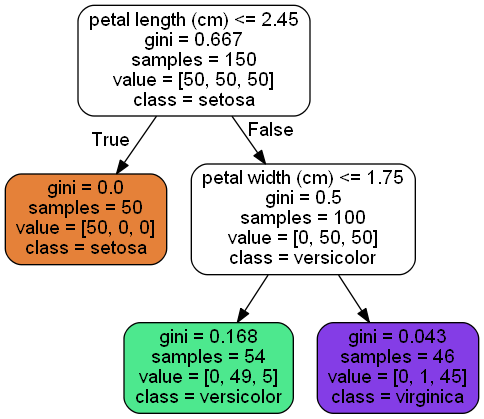
- sample : 얼마나 많은 훈련 샘플이 적용되었는지를 헤아린 것
- value : 각 클래스에 얼마나 많은 훈련 샘플이 있는지 알려주는 것
- gini : 각 노드의 불순도
    - 0~1 사이의 값을 가짐
    - 0으로 갈수록 불순도가 낮음

## 1) 클래스 확률 추정
- 특정 클래스 k에 속할 확률
    - 해당 샘플에 대한 리프 노드를 찾은 후, 그 노드에 있는 클래스 k의 훈련 샘플의 비율을 반환
    - 만약 각 샘플의 리프 노드가 같다면 각 샘플의 feature에 상관없이 클래스 확률이 동일

In [18]:
# 각 클래스에 속할 확률
print(tree_clf.predict_proba([[5,1.5]]))

# 예측 클래스
print(tree_clf.predict([[5,1.5]]))

[[0.         0.90740741 0.09259259]]
[1]


## CART 훈련 알고리즘
- 어떤 특성 k의 임계값 t를 사용하여 두개의 서브셋으로 나눔
- k와 t를 찾는 방법
    - 크기에 따른 가중치가 적용된 가장 순수한 서브셋으로 나눌 수 있는 (k,t) 짝을 찾음